# Εργασία 5 - Feature Importance, Dimensionality Reduction, KNN


Ευθυμιάδης Κωνσταντίνος<br>
ΑΕΜ: 240

## Εισαγωγή Βιβλιοθηκών

In [ ]:
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from sklearn.neighbors import KNeighborsClassifier

import random
from sklearn.metrics import accuracy_score

## Πρώτο Ερώτημα

### Εισαγωγή Δεδομένων

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Δεύτερο Ερώτημα

### Προβολή plot

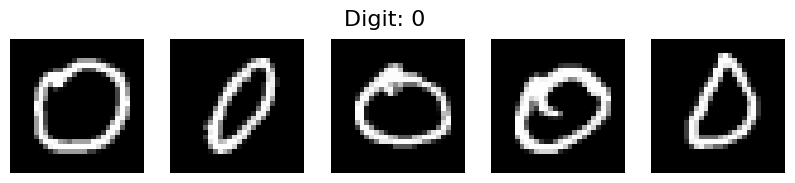

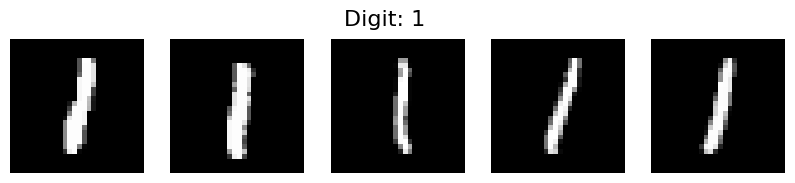

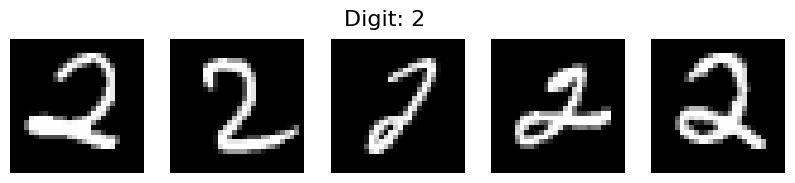

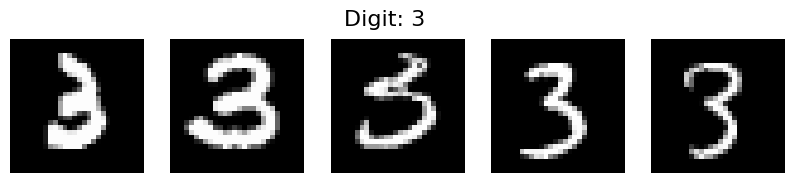

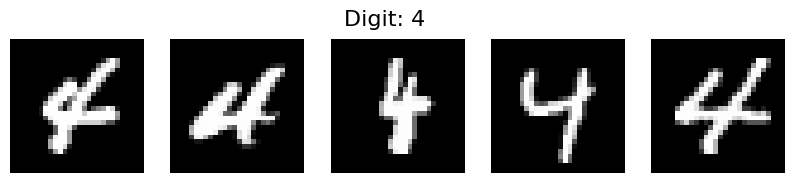

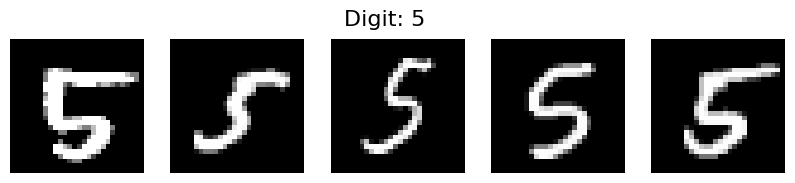

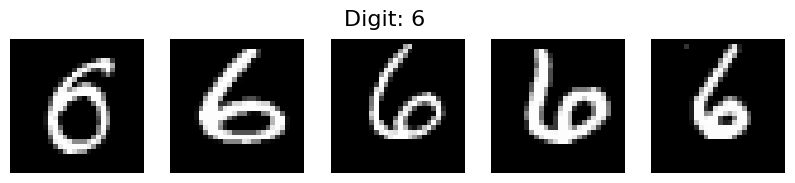

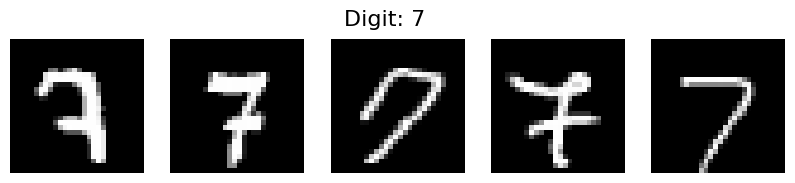

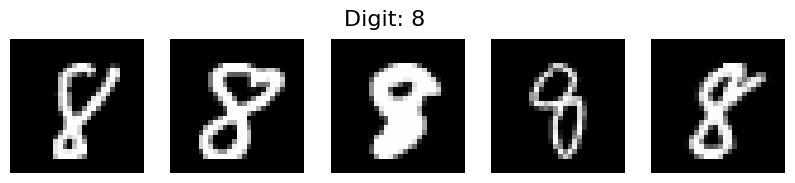

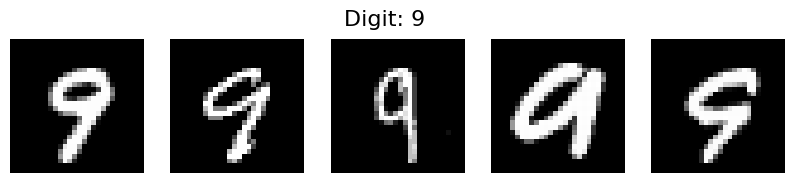

In [ ]:
from os import replace

np.random.seed(0)
number_of_digits_to_show= 5
for digit in range(10):
    all_the_same_digits = np.where(y_train == digit)[0]

    digits_to_show= np.random.choice(all_the_same_digits, number_of_digits_to_show, replace=False)

    plt.figure(figsize=(10, 2))
    plt.suptitle(f"Digit: {digit}", fontsize=16)

    for i, img in enumerate(digits_to_show):
      plt.subplot(1, number_of_digits_to_show, i + 1)
      plt.imshow(x_train[img], cmap='gray')
      plt.axis('off')

    plt.show()

## Τρίτο Ερώτημα

Μια εικόνα έχει μέγεθος 28 Χ 28 pixels, κάτι που γίνεται εύκολα αντιληπτό από το x_train.shape.<br>
Δεν είναι σημαντικά όλα τα pixels της εικόνας ενός ψηφίου, αφού μόνο τα pixels με λευκό χρώμα αναπαριστούν τον αριθμό. Επομένως, πολλά από τα pixels με μαύρο χρώμα, τα οποία καλύπτουν και το μεγαλύτερο μέρος των εικόνων, δεν παρέχουν κάποια ουσιαστική πληροφορία, καθώς έχουν το χρώμα του background

## Τέταρτο Ερώτημα

### Μετατροπή Εικόνων σε διανύσματα

In [ ]:
x_train_vector = x_train.reshape(len(x_train), 28*28)
x_test_vector = x_test.reshape(len(x_test), 28*28)

x_train_vector.shape, x_test_vector.shape

((60000, 784), (10000, 784))

## Πέμπτο Ερώτημα

### Ορισμός λίστας πλήθους κοντινότερων γειτόνων

In [ ]:
list_with_k= [5, 15, 51, int(np.sqrt(len(x_train_vector))+1)]
list_with_k

[5, 15, 51, 245]

### Εκπαίδευση ταξινομητών KNN

In [ ]:
accuracy_list_for_train= []
accuracy_list_for_test= []

for k in list_with_k:
  print("For k=", k)
  model= KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  model.fit(x_train_vector,y_train)

  y_pred=model.predict(x_train_vector)
  acc= accuracy_score(y_train,y_pred)
  accuracy_list_for_train.append(acc)
  print("Accuracy for training set: ",acc)

  y_pred=model.predict(x_test_vector)
  acc= accuracy_score(y_test,y_pred)
  accuracy_list_for_test.append(acc)
  print("Accuracy for test set: ",acc)
  print()

For k= 5
Accuracy for training set:  0.9819166666666667
Accuracy for test set:  0.9688

For k= 15
Accuracy for training set:  0.971
Accuracy for test set:  0.9633

For k= 51
Accuracy for training set:  0.9532333333333334
Accuracy for test set:  0.9533

For k= 245
Accuracy for training set:  0.92095
Accuracy for test set:  0.9238



### Δημιουργία Line plot

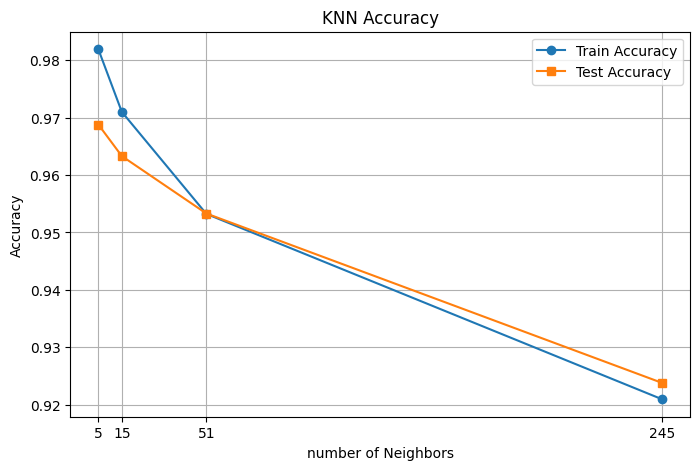

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(list_with_k, accuracy_list_for_train, marker='o', label='Train Accuracy')
plt.plot(list_with_k, accuracy_list_for_test, marker='s', label='Test Accuracy')

plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.xticks(list_with_k)
plt.grid(True)
plt.legend()
plt.show()

## Έκτο Ερώτημα

In [ ]:
new_x_train_vector= x_train_vector/255
new_x_test_vector= x_test_vector/255

accuracy_list_for_train= []
accuracy_list_for_test= []

for k in list_with_k:
  print("For k=", k)
  model= KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  model.fit(new_x_train_vector,y_train)

  y_pred=model.predict(new_x_train_vector)
  acc= accuracy_score(y_train,y_pred)
  accuracy_list_for_train.append(acc)
  print("Accuracy for training set: ",acc)

  y_pred=model.predict(new_x_test_vector)
  acc= accuracy_score(y_test,y_pred)
  accuracy_list_for_test.append(acc)
  print("Accuracy for test set: ",acc)
  print()

For k= 5
Accuracy for training set:  0.9819166666666667
Accuracy for test set:  0.9688

For k= 15
Accuracy for training set:  0.971
Accuracy for test set:  0.9633

For k= 51
Accuracy for training set:  0.9532333333333334
Accuracy for test set:  0.9533

For k= 245
Accuracy for training set:  0.92095
Accuracy for test set:  0.9238



### Δημιουργία Line plot

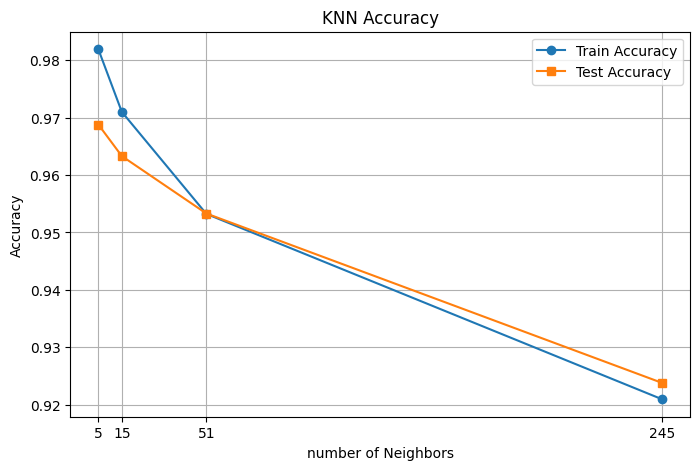

In [ ]:
plt.figure(figsize=(8,5))

plt.plot(list_with_k, accuracy_list_for_train, marker='o', label='Train Accuracy')
plt.plot(list_with_k, accuracy_list_for_test, marker='s', label='Test Accuracy')

plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy')
plt.xticks(list_with_k)
plt.grid(True)
plt.legend()
plt.show()

Παρατηρείται ότι η ακρίβεια παραμένει ίδια. Αυτό οφείλεται καθώς ο knn, υπολογίζει την ευκλείδια απόσταση μεταξύ των σημείων. Επομένως, αφού όλα τα δεδομένα πολλαπλασιάζονται με τον ίδιο παράγοντα (1/255). Άρα, οι σχετικές αποστάσεις μεταξύ των σημείων παραμένουν σταθερές, με αποτέλεσμα να επιλέγονται οι ίδιοι γείτονες και οι προβλέψεις να παραμένουν ίδιες.

## Έβδομο Ερώτημα

In [ ]:
best_knn_model= KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
best_knn_model.fit(new_x_train_vector,y_train)

KNeighborsClassifier(n_jobs=-1)

### Εισαγωγή ζωγραφιάς

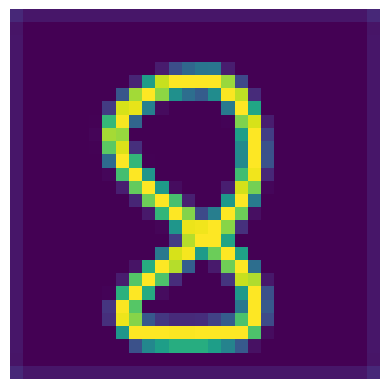

In [ ]:
drawing= Image.open("drawing.png").convert('L')
plt.imshow(drawing)
plt.axis('off')
plt.show()

### Μετατροπή σε Array

In [ ]:
drawing_array= np.array(drawing)
drawing_array.shape

(28, 28)

### Μετατροπή σε Vector

In [ ]:
drawing_vector= drawing_array.flatten()
drawing_vector= drawing_vector/255
drawing_vector= drawing_vector.reshape(1, -1)
drawing_vector.shape

(1, 784)

### Πρόβλεψη αριθμού

In [ ]:
pred_number= model.predict(drawing_vector)
print("Predicted number: ", pred_number[0])

Predicted number:  8
